In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#Metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score,precision_recall_curve
from sklearn.model_selection import cross_val_score

print(tf.__version__,keras.__version__ )

2.1.0 2.2.4-tf


In [82]:
fashion_mnist = keras.datasets.fashion_mnist

In [83]:
print('fashion_mnist type:', type(fashion_mnist))
fashion_Data = fashion_mnist.load_data()
print('data type: {}, \ndata length:{}'.format(type(fashion_Data),len(fashion_Data)))

fashion_mnist type: <class 'module'>
data type: <class 'tuple'>, 
data length:2


In [84]:
(X_train_all, y_train_all), (X_test, y_test) = fashion_Data
print('X_train_all shape:', X_train_all.shape)
print('y_train_all shape:', y_train_all.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train_all shape: (60000, 28, 28)
y_train_all shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [85]:
X_train_all[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

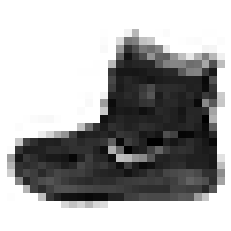

In [86]:
plt.imshow(X_train_all[0], cmap="binary")
plt.axis('off');

In [87]:
print(y_train_all)
print('Unique values in y_train_all:', set(y_train_all))

[9 0 0 ... 3 0 5]
Unique values in y_train_all: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [88]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [89]:
X_valid, X_train = X_train_all[:5000] / 255., X_train_all[5000:] / 255.
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
X_test = X_test / 255.

In [90]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

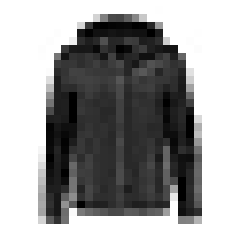

In [91]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off');

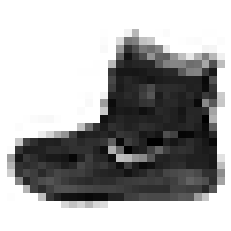

In [92]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off');

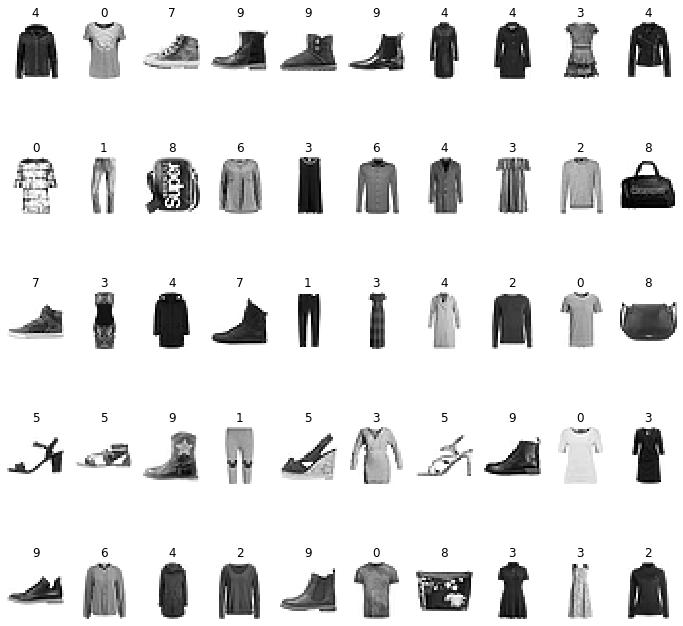

In [93]:
plt.figure(figsize=(12,12))
for i in range(1, 51):
    plt.subplot(5, 10, i)
    random_id = X_train[i-1]
    random_id_image = random_id.reshape(28, 28)
    plt.imshow(random_id_image, cmap='binary')
    plt.title(y_train[i-1])
    plt.axis("off")  


In [94]:
y_names = ["T-shirt", "Trouser", "Pullover", "Some_Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [95]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.7116 - sparse_categorical_accuracy: 0.7649 - val_loss: 0.5139 - val_sparse_categorical_accuracy: 0.8208
Epoch 2/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4882 - sparse_categorical_accuracy: 0.8296 - val_loss: 0.4483 - val_sparse_categorical_accuracy: 0.8448
Epoch 3/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.4462 - sparse_categorical_accuracy: 0.8437 - val_loss: 0.4240 - val_sparse_categorical_accuracy: 0.8516
Epoch 4/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4170 - sparse_categorical_accuracy: 0.8547 - val_loss: 0.4101 - val_sparse_categorical_accuracy: 0.8552
Epoch 5/30
55000/55000 [==============================] - 5s 84us/sample - loss: 0.3969 - sparse_categorical_accuracy: 0.8600 - val_loss: 0.4022 - val_sparse_categorical_accuracy: 0.8632
Epoch 6/30
55000

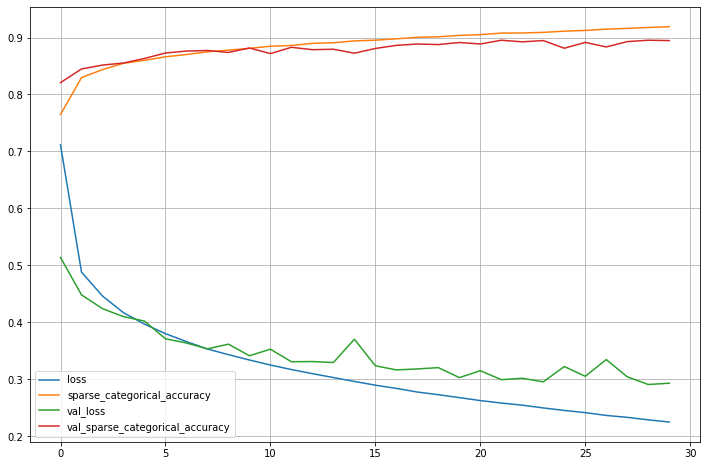

In [97]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.show()

In [98]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3260 - sparse_categorical_accuracy: 0.8841


[0.32595137346982955, 0.8841]

In [99]:
X_pred = X_test[:20]
y_prob = model.predict(X_pred)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   , 0.016, 0.   ,
        0.981],
       [0.   , 0.   , 0.997, 0.   , 0.002, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.235, 0.   , 0.009, 0.001, 0.001, 0.   , 0.754, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.009, 0.   , 0.976, 0.   , 0.015, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.005, 0.   , 0.995, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.   , 0.998, 0.   , 0.001, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.998, 0.   ,
        0.001],
       [0.   , 0.   , 0.098, 0.   , 0.886, 0.   , 0.016, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 

In [100]:
y_pred = model.predict_classes(X_pred)
print('Y_actual first 20 sample        :',y_test[:20])
print('Y_predicted for first 20 samples:',y_pred)

Y_actual first 20 sample        : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
Y_predicted for first 20 samples: [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]


In [101]:
conf_mx = confusion_matrix(y_test[:20], y_pred)
conf_mx

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

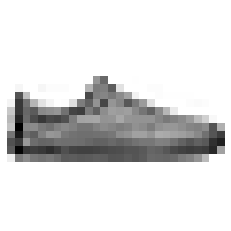

In [102]:
plt.imshow(X_pred[12], cmap="binary")
plt.axis('off');

In [106]:
y_prob_all = model.predict(X_test)
y_pred_all = model.predict_classes(X_test)

In [107]:
conf_mx_all = confusion_matrix(y_test, y_pred_all)
conf_mx_all

array([[862,   1,  18,  20,   4,   2,  85,   0,   8,   0],
       [  6, 967,   0,  21,   3,   0,   2,   0,   1,   0],
       [ 22,   0, 851,  11,  53,   0,  62,   0,   1,   0],
       [ 27,  10,  25, 865,  38,   0,  32,   0,   3,   0],
       [  0,   1, 119,  20, 767,   1,  89,   0,   3,   0],
       [  0,   0,   0,   1,   0, 958,   0,  26,   1,  14],
       [133,   0,  93,  21,  43,   0, 699,   0,  11,   0],
       [  0,   0,   0,   0,   0,  19,   0, 963,   0,  18],
       [  6,   0,   5,   6,   4,   2,  13,   5, 959,   0],
       [  1,   0,   0,   0,   0,   6,   0,  43,   0, 950]], dtype=int64)

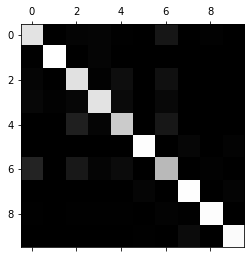

In [108]:
plt.matshow(conf_mx_all, cmap='gray')
plt.show()